#### Цель задания:
Познакомиться с основами обучения с подкреплением (Reinforcement Learning, RL), понять основные концепции и применить их на практике, используя простой алгоритм Q-Learning для решения задачи.

#### Задание:

1. **Теоретическая часть:**
    - Прочитайте материалы о концепциях обучения с подкреплением: агент, среда, действия, награды, состояния, политика, функция ценности и функция награды.
    - Напишите краткое эссе (1-2 страницы) о том, как обучение с подкреплением отличается от других видов обучения (например, обучение с учителем и обучение без учителя).

2. **Практическая часть:**
    - Реализуйте алгоритм Q-Learning для решения задачи "Замкнутый лабиринт" (Gridworld).
    - Визуализируйте политику и функцию ценности, найденные вашим агентом.

3. **Дополнительные задания (для продвинутых студентов):**
    - Реализуйте алгоритм SARSA и сравните его результаты с Q-Learning на той же задаче.
    - Изучите и реализуйте epsilon-greedy стратегию для выбора действий.

**Все результаты выполнения работы поместите в один блокнот Colab, сохраните, расшарьте для просмотра и направьте преподавателю на проверку.**


#### Подробное описание заданий 2 и 3:

2. **Практическая часть:**

    **Часть 1: Реализация Q-Learning**
    - Создайте среду "Gridworld" размером 5x5. Ваша задача — найти путь от стартовой клетки (в левом верхнем углу) до целевой клетки (в правом нижнем углу), избегая препятствий.
    - Используйте следующую формулу обновления Q-значений:

$
Q(s, a) \leftarrow Q(s, a) + \alpha [r + \gamma \max_{a'} Q(s', a') - Q(s, a)]
$

      где:
- $ s $ — текущее состояние,
- $ a $ — текущее действие,
- $ r $ — награда,
- $ s' $ — новое состояние,
- $ \alpha $ — скорость обучения (learning rate),
- 4 \gamma $ — коэффициент дисконтирования (discount factor).

    **Пример кода для начала:**

    ```python
    import numpy as np

    # Параметры
    alpha = 0.1
    gamma = 0.9
    epsilon = 0.1
    episodes = 1000
    grid_size = 5

    # Инициализация Q-таблицы
    Q = np.zeros((grid_size, grid_size, 4))

    # Функции для выбора действий и обновления Q-таблицы
    def choose_action(state):
        if np.random.rand() < epsilon:
            return np.random.randint(4)
        else:
            return np.argmax(Q[state])

    def update_q(state, action, reward, next_state):
        best_next_action = np.argmax(Q[next_state])
        td_target = reward + gamma * Q[next_state][best_next_action]
        td_error = td_target - Q[state][action]
        Q[state][action] += alpha * td_error

    # Обучение агента
    for episode in range(episodes):
        state = (0, 0)
        done = False
        while not done:
            action = choose_action(state)
            next_state, reward, done = step(state, action)
            update_q(state, action, reward, next_state)
            state = next_state

    # Визуализация политики
    policy = np.argmax(Q, axis=2)
    print("Оптимальная политика:")
    print(policy)
    ```

    **Часть 2: Визуализация политики и функции ценности**
    - Визуализируйте оптимальную политику и функцию ценности после обучения.
    - Объясните результаты и проанализируйте, как агент принимает решения в разных состояниях.

3. **Дополнительные задания:**
    - Реализуйте алгоритм SARSA и сравните его с Q-Learning.
    - Внедрите epsilon-greedy стратегию для выбора действий и проанализируйте ее влияние на обучение.

#### Критерии оценки:

- Понимание теоретических концепций обучения с подкреплением.
- Корректность реализации алгоритма Q-Learning.
- Качество визуализации и анализ результатов.
- Выполнение дополнительных заданий (если применимо).


#Примеры кода


**Политика:** Оптимальная политика показывает действия, которые агент предпочитает в каждом состоянии, чтобы максимизировать награду.

------------
**Функция ценности:** Функция ценности показывает ожидаемую накопленную награду для каждого состояния.

Реализация Q-Learning

In [1]:
import numpy as np

# Параметры
alpha = 0.1
gamma = 0.9
epsilon = 0.1
episodes = 1000
grid_size = 5

# Действия: вверх, вниз, влево, вправо
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

# Инициализация Q-таблицы
Q = np.zeros((grid_size, grid_size, len(actions)))

# Функции для выбора действий и обновления Q-таблицы
def choose_action(state):
    if np.random.rand() < epsilon:
        return np.random.randint(len(actions))
    else:
        return np.argmax(Q[state])

def step(state, action):
    next_state = (state[0] + actions[action][0], state[1] + actions[action][1])
    if next_state[0] < 0 or next_state[0] >= grid_size or next_state[1] < 0 or next_state[1] >= grid_size:
        next_state = state  # оставаться на месте, если выходит за пределы
    reward = 1 if next_state == (grid_size-1, grid_size-1) else -0.1
    done = next_state == (grid_size-1, grid_size-1)
    return next_state, reward, done

def update_q(state, action, reward, next_state):
    best_next_action = np.argmax(Q[next_state])
    td_target = reward + gamma * Q[next_state][best_next_action]
    td_error = td_target - Q[state][action]
    Q[state][action] += alpha * td_error

# Обучение агента
for episode in range(episodes):
    state = (0, 0)
    done = False
    while not done:
        action = choose_action(state)
        next_state, reward, done = step(state, action)
        update_q(state, action, reward, next_state)
        state = next_state

# Визуализация политики
policy = np.argmax(Q, axis=2)
print("Оптимальная политика:")
print(policy)


Оптимальная политика:
[[3 3 1 2 1]
 [3 3 1 1 1]
 [1 1 1 3 1]
 [3 3 1 1 1]
 [3 3 3 3 0]]


Визуализация политики и функции ценности

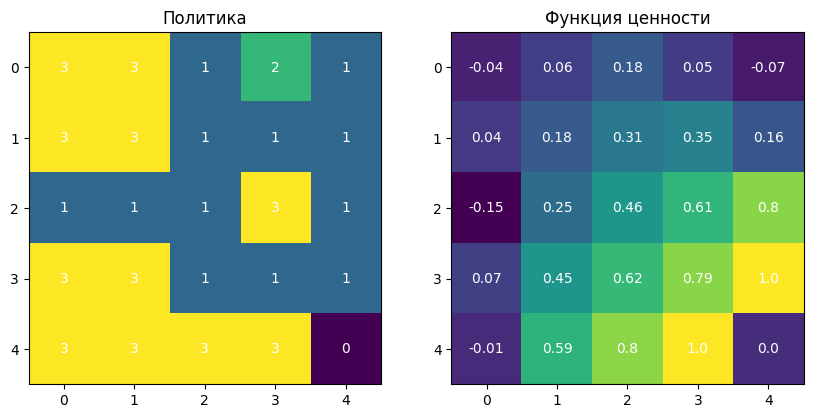

In [2]:
import matplotlib.pyplot as plt

# Функция ценности
value_function = np.max(Q, axis=2)

plt.figure(figsize=(10, 6))

# Политика
plt.subplot(1, 2, 1)
plt.title('Политика')
plt.imshow(policy, cmap='viridis', origin='upper')
for i in range(grid_size):
    for j in range(grid_size):
        plt.text(j, i, policy[i, j], ha='center', va='center', color='white')

# Функция ценности
plt.subplot(1, 2, 2)
plt.title('Функция ценности')
plt.imshow(value_function, cmap='viridis', origin='upper')
for i in range(grid_size):
    for j in range(grid_size):
        plt.text(j, i, round(value_function[i, j], 2), ha='center', va='center', color='white')

plt.show()


Реализация SARSA

In [3]:
def update_sarsa_q(state, action, reward, next_state, next_action):
    td_target = reward + gamma * Q[next_state][next_action]
    td_error = td_target - Q[state][action]
    Q[state][action] += alpha * td_error

# Обучение агента с использованием SARSA
Q = np.zeros((grid_size, grid_size, len(actions)))
for episode in range(episodes):
    state = (0, 0)
    action = choose_action(state)
    done = False
    while not done:
        next_state, reward, done = step(state, action)
        next_action = choose_action(next_state)
        update_sarsa_q(state, action, reward, next_state, next_action)
        state, action = next_state, next_action

policy_sarsa = np.argmax(Q, axis=2)
print("Оптимальная политика (SARSA):")
print(policy_sarsa)


Оптимальная политика (SARSA):
[[3 3 3 1 1]
 [3 3 3 3 1]
 [3 3 3 3 1]
 [3 3 3 3 1]
 [3 3 3 3 0]]


Реализация epsilon-greedy стратегии

In [4]:
def update_sarsa_q(state, action, reward, next_state, next_action):
    td_target = reward + gamma * Q[next_state][next_action]
    td_error = td_target - Q[state][action]
    Q[state][action] += alpha * td_error

# Обучение агента с использованием SARSA
Q = np.zeros((grid_size, grid_size, len(actions)))
for episode in range(episodes):
    state = (0, 0)
    action = choose_action(state)
    done = False
    while not done:
        next_state, reward, done = step(state, action)
        next_action = choose_action(next_state)
        update_sarsa_q(state, action, reward, next_state, next_action)
        state, action = next_state, next_action

policy_sarsa = np.argmax(Q, axis=2)
print("Оптимальная политика (SARSA):")
print(policy_sarsa)


Оптимальная политика (SARSA):
[[3 1 1 1 1]
 [3 3 1 1 1]
 [3 3 3 3 1]
 [0 3 1 3 1]
 [3 3 3 3 0]]


Обучение с подкреплением: отличия от других методов машинного обучения

Обучение с подкреплением (Reinforcement Learning, RL) представляет собой одну из ключевых парадигм машинного обучения, которая выделяется своим подходом к решению задач принятия решений в динамических средах. В отличие от традиционных подходов, таких как обучение с учителем (Supervised Learning) и обучение без учителя (Unsupervised Learning), обучение с подкреплением основывается на взаимодействии агента с окружающей средой для достижения цели через максимизацию накопленной награды.

Основные концепции обучения с подкреплением:

1. Агент: Это сущность, принимающая решения в среде. Агент взаимодействует со средой, выполняя определенные действия.
   
2. Среда: Место, где действует агент. Среда может быть реальной (например, роботы в физическом мире) или виртуальной (игры, симуляции).

3. Действия: Операции, которые выполняет агент в ответ на текущее состояние среды. Эти действия могут изменять состояние среды.

4. Награды: Обратная связь, которую получает агент за выполнение действий. Награды могут быть положительными (если действие улучшает ситуацию) или отрицательными (если ухудшает).


5. Состояния: Текущие условия среды, в которых находится агент. На основе состояний агент выбирает свои действия.

6. Политика: Стратегия выбора действий, основанная на текущем состоянии среды. Политики могут быть детерминированными (однозначный выбор действия) или стохастическими (вероятностным выбором).

7. Функция ценности: Оценка ожидаемой суммарной будущей награды при выполнении определенной политики в конкретном состоянии. Функция ценности помогает агенту оценить долгосрочные последствия своих действий.

8. Функция награды: Механизм преобразования текущего состояния и действия в награду. Эта функция определяет, насколько выгодно было совершить то или иное действие.

Отличие от обучения с учителем:

Обучение с учителем предполагает наличие размеченных данных, где каждому входному примеру соответствует известный правильный выход. Например, при классификации изображений обучающая модель знает правильные метки для каждого изображения. Задача модели заключается в предсказании правильных меток для новых примеров.

В обучении с подкреплением агент не имеет заранее известных правильных ответов. Вместо этого он учится путем взаимодействия с окружающей средой и получения наград за свои действия. Целью является максимизация общей накопленной награды, а не минимизация ошибки предсказания, как в случае обучения с учителем.

Отличие от обучения без учителя:

Обучение без учителя направлено на выявление скрытых структур в данных без использования разметки. Примером может служить кластеризация, когда данные группируются на основании их схожести. В этом подходе нет явной цели, кроме анализа структуры данных.

В обучении с подкреплением, напротив, всегда присутствует цель — максимизация награды. Агент активно исследует среду, пробуя различные стратегии поведения, чтобы достичь этой цели. Таким образом, хотя оба метода предполагают отсутствие разметки, обучение с подкреплением включает активный процесс поиска оптимального поведения, тогда как обучение без учителя фокусируется на анализе данных.



Заключение:

Таким образом, обучение с подкреплением существенно отличается от обучения с учителем и обучения без учителя своими целями и методами работы. Оно ориентировано на принятие решений в условиях неопределенности, где обратная связь поступает в виде наград, а агент стремится найти оптимальное поведение для максимизации этих наград. Этот метод особенно полезен в ситуациях, где необходимо принимать последовательные решения в динамической среде, такой как игры, управление роботами или финансовые рынки.



In [5]:
# Реализовать код на Питоне: алгоритм Q-Learning для решения задачи "Замкнутый лабиринт" (Gridworld)

import numpy as np

# Параметры
alpha = 0.1
gamma = 0.9
epsilon = 1.0
episodes = 2000
grid_size = 5

# Действия: вверх, вниз, влево, вправо
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

# Инициализация Q-таблицы
Q = np.zeros((grid_size, grid_size, len(actions)))

# Загрузка сохраненной таблицы, если есть
try:
    Q = np.load('q_table.npy')
except FileNotFoundError:
    pass

# Функции для выбора действий и обновления Q-таблицы
def choose_action(state):
    if np.random.rand() < epsilon:
        return np.random.randint(len(actions))
    else:
        return np.argmax(Q[state])

def step(state, action):
    next_state = (state[0] + actions[action][0], state[1] + actions[action][1])
    if next_state[0] < 0 or next_state[0] >= grid_size or next_state[1] < 0 or next_state[1] >= grid_size:
        next_state = state  # оставаться на месте, если выходит за пределы
    reward = 1 if next_state == (grid_size-1, grid_size-1) else -0.1
    done = next_state == (grid_size-1, grid_size-1)
    return next_state, reward, done

def update_q(state, action, reward, next_state):
    best_next_action = np.argmax(Q[next_state])
    td_target = reward + gamma * Q[next_state][best_next_action]
    td_error = td_target - Q[state][action]
    Q[state][action] += alpha * td_error

# Коэффициенты уменьшения epsilon и alpha
epsilon_decay = 0.995
alpha_decay = 0.999

# Обучение агента
for episode in range(episodes):
    state = (0, 0)
    done = False

    while not done:
        action = choose_action(state)
        next_state, reward, done = step(state, action)
        update_q(state, action, reward, next_state)
        state = next_state

    # Уменьшаем epsilon и alpha
    epsilon *= epsilon_decay
    alpha *= alpha_decay

    # Выводим информацию о процессе обучения каждые 100 эпизодов
    if episode % 100 == 0:
        print(f'Episode {episode}, Epsilon: {epsilon:.2f}, Alpha: {alpha:.2f}')

# Сохраняем обученную модель
np.save('q_table.npy', Q)

# Визуализация оптимальной политики
policy = np.argmax(Q, axis=2)
print("\nОптимальная политика:")
print(policy)




Episode 0, Epsilon: 0.99, Alpha: 0.10
Episode 100, Epsilon: 0.60, Alpha: 0.09
Episode 200, Epsilon: 0.37, Alpha: 0.08
Episode 300, Epsilon: 0.22, Alpha: 0.07
Episode 400, Epsilon: 0.13, Alpha: 0.07
Episode 500, Epsilon: 0.08, Alpha: 0.06
Episode 600, Epsilon: 0.05, Alpha: 0.05
Episode 700, Epsilon: 0.03, Alpha: 0.05
Episode 800, Epsilon: 0.02, Alpha: 0.04
Episode 900, Epsilon: 0.01, Alpha: 0.04
Episode 1000, Epsilon: 0.01, Alpha: 0.04
Episode 1100, Epsilon: 0.00, Alpha: 0.03
Episode 1200, Epsilon: 0.00, Alpha: 0.03
Episode 1300, Epsilon: 0.00, Alpha: 0.03
Episode 1400, Epsilon: 0.00, Alpha: 0.02
Episode 1500, Epsilon: 0.00, Alpha: 0.02
Episode 1600, Epsilon: 0.00, Alpha: 0.02
Episode 1700, Epsilon: 0.00, Alpha: 0.02
Episode 1800, Epsilon: 0.00, Alpha: 0.02
Episode 1900, Epsilon: 0.00, Alpha: 0.01

Оптимальная политика:
[[3 3 3 1 1]
 [1 1 1 3 1]
 [1 1 3 3 1]
 [3 3 1 1 1]
 [3 3 3 3 0]]


Episode 0, Epsilon: 0.99, Alpha: 0.10
Episode 100, Epsilon: 0.60, Alpha: 0.09
Episode 200, Epsilon: 0.37, Alpha: 0.08
Episode 300, Epsilon: 0.22, Alpha: 0.07
Episode 400, Epsilon: 0.13, Alpha: 0.07
Episode 500, Epsilon: 0.08, Alpha: 0.06
Episode 600, Epsilon: 0.05, Alpha: 0.05
Episode 700, Epsilon: 0.03, Alpha: 0.05
Episode 800, Epsilon: 0.02, Alpha: 0.04
Episode 900, Epsilon: 0.01, Alpha: 0.04
Episode 1000, Epsilon: 0.01, Alpha: 0.04
Episode 1100, Epsilon: 0.00, Alpha: 0.03
Episode 1200, Epsilon: 0.00, Alpha: 0.03
Episode 1300, Epsilon: 0.00, Alpha: 0.03
Episode 1400, Epsilon: 0.00, Alpha: 0.02
Episode 1500, Epsilon: 0.00, Alpha: 0.02
Episode 1600, Epsilon: 0.00, Alpha: 0.02
Episode 1700, Epsilon: 0.00, Alpha: 0.02
Episode 1800, Epsilon: 0.00, Alpha: 0.02
Episode 1900, Epsilon: 0.00, Alpha: 0.01


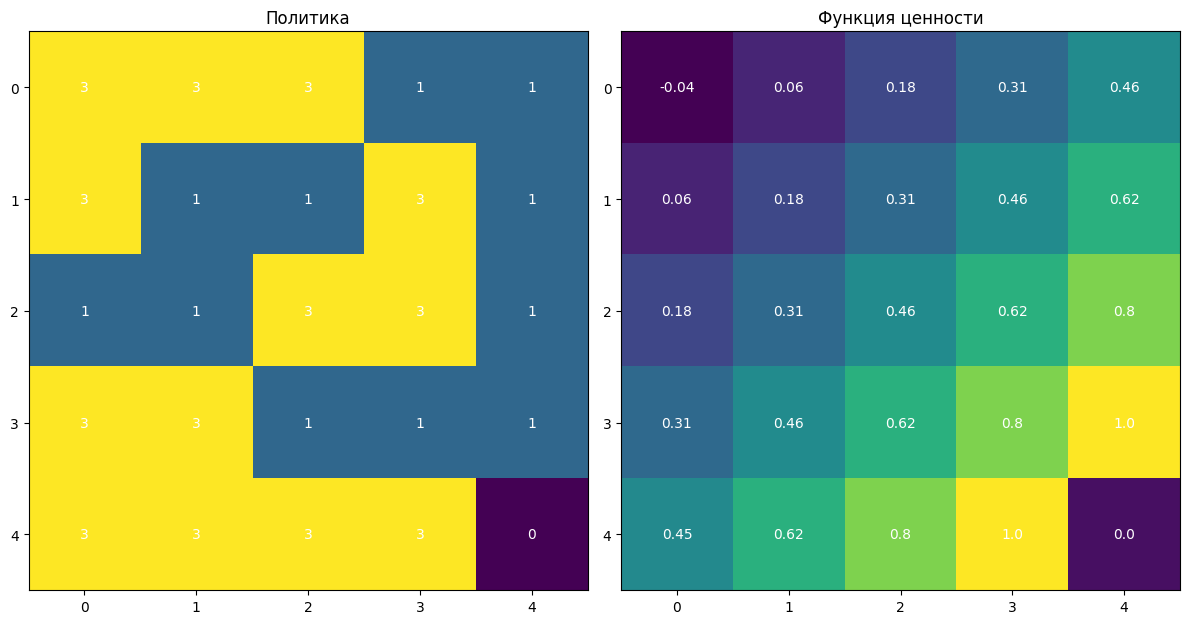

In [6]:
# Визуализировать политику и функцию ценности, найденные вашим агентом.

import numpy as np
import matplotlib.pyplot as plt

# Параметры
alpha = 0.1
gamma = 0.9
epsilon = 1.0
episodes = 2000
grid_size = 5

# Действия: вверх, вниз, влево, вправо
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

# Инициализация Q-таблицы
Q = np.zeros((grid_size, grid_size, len(actions)))

# Загрузка сохраненной таблицы, если есть
try:
    Q = np.load('q_table.npy')
except FileNotFoundError:
    pass

# Функции для выбора действий и обновления Q-таблицы
def choose_action(state):
    if np.random.rand() < epsilon:
        return np.random.randint(len(actions))
    else:
        return np.argmax(Q[state])

def step(state, action):
    next_state = (state[0] + actions[action][0], state[1] + actions[action][1])
    if next_state[0] < 0 or next_state[0] >= grid_size or next_state[1] < 0 or next_state[1] >= grid_size:
        next_state = state  # оставаться на месте, если выходит за пределы
    reward = 1 if next_state == (grid_size-1, grid_size-1) else -0.1
    done = next_state == (grid_size-1, grid_size-1)
    return next_state, reward, done

def update_q(state, action, reward, next_state):
    best_next_action = np.argmax(Q[next_state])
    td_target = reward + gamma * Q[next_state][best_next_action]
    td_error = td_target - Q[state][action]
    Q[state][action] += alpha * td_error

# Коэффициенты уменьшения epsilon и alpha
epsilon_decay = 0.995
alpha_decay = 0.999

# Обучение агента
for episode in range(episodes):
    state = (0, 0)
    done = False

    while not done:
        action = choose_action(state)
        next_state, reward, done = step(state, action)
        update_q(state, action, reward, next_state)
        state = next_state

    # Уменьшаем epsilon и alpha
    epsilon *= epsilon_decay
    alpha *= alpha_decay

    # Выводим информацию о процессе обучения каждые 100 эпизодов
    if episode % 100 == 0:
        print(f'Episode {episode}, Epsilon: {epsilon:.2f}, Alpha: {alpha:.2f}')

# Сохраняем обученную модель
np.save('q_table.npy', Q)

# Визуализация оптимальной политики
policy = np.argmax(Q, axis=2)
value_function = np.max(Q, axis=2)

plt.figure(figsize=(12, 6))

# Политика
plt.subplot(1, 2, 1)
plt.title('Политика')
plt.imshow(policy, cmap='viridis', origin='upper')
for i in range(grid_size):
    for j in range(grid_size):
        plt.text(j, i, policy[i, j], ha='center', va='center', color='white')

# Функция ценности
plt.subplot(1, 2, 2)
plt.title('Функция ценности')
plt.imshow(value_function, cmap='viridis', origin='upper')
for i in range(grid_size):
    for j in range(grid_size):
        plt.text(j, i, round(value_function[i, j], 2), ha='center', va='center', color='white')

plt.tight_layout()
plt.show()






Episode 0, Epsilon: 0.99, Alpha: 0.10
Episode 100, Epsilon: 0.60, Alpha: 0.09
Episode 200, Epsilon: 0.37, Alpha: 0.08
Episode 300, Epsilon: 0.22, Alpha: 0.07
Episode 400, Epsilon: 0.13, Alpha: 0.07
Episode 500, Epsilon: 0.08, Alpha: 0.06
Episode 600, Epsilon: 0.05, Alpha: 0.05
Episode 700, Epsilon: 0.03, Alpha: 0.05
Episode 800, Epsilon: 0.02, Alpha: 0.04
Episode 900, Epsilon: 0.01, Alpha: 0.04
Episode 1000, Epsilon: 0.01, Alpha: 0.04
Episode 1100, Epsilon: 0.00, Alpha: 0.03
Episode 1200, Epsilon: 0.00, Alpha: 0.03
Episode 1300, Epsilon: 0.00, Alpha: 0.03
Episode 1400, Epsilon: 0.00, Alpha: 0.02
Episode 1500, Epsilon: 0.00, Alpha: 0.02
Episode 1600, Epsilon: 0.00, Alpha: 0.02
Episode 1700, Epsilon: 0.00, Alpha: 0.02
Episode 1800, Epsilon: 0.00, Alpha: 0.02
Episode 1900, Epsilon: 0.00, Alpha: 0.01
SARSA Episode 0, Epsilon: 0.00, Alpha: 0.01
SARSA Episode 100, Epsilon: 0.00, Alpha: 0.01
SARSA Episode 200, Epsilon: 0.00, Alpha: 0.01
SARSA Episode 300, Epsilon: 0.00, Alpha: 0.01
SARSA Epis

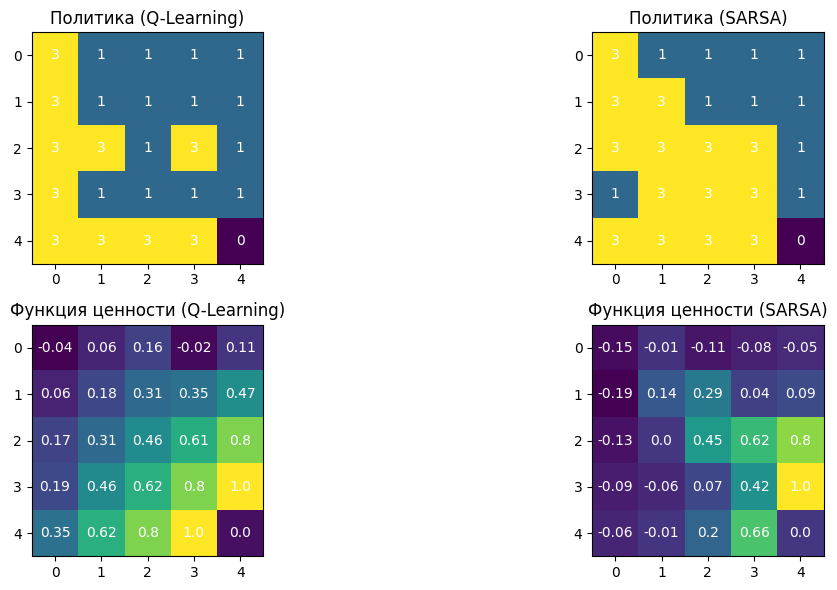

In [7]:
# Реализовать алгоритм SARSA и сравните его результаты с Q-Learning на той же задаче

import numpy as np
import matplotlib.pyplot as plt

# Параметры
alpha = 0.1
gamma = 0.9
epsilon = 1.0
episodes = 2000
grid_size = 5

# Действия: вверх, вниз, влево, вправо
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

# Инициализация Q-таблиц для обоих методов
Q_QLearning = np.zeros((grid_size, grid_size, len(actions)))
Q_SARSA = np.zeros((grid_size, grid_size, len(actions)))

# Загрузка сохраненных таблиц, если они существуют
try:
    Q_QLearning = np.load('q_table_QLearning.npy')
except FileNotFoundError:
    pass

try:
    Q_SARSA = np.load('q_table_SARSA.npy')
except FileNotFoundError:
    pass

# Функции для выбора действий и обновления Q-таблицы
def choose_action(state, q_table):
    if np.random.rand() < epsilon:
        return np.random.randint(len(actions))
    else:
        return np.argmax(q_table[state])

def step(state, action):
    next_state = (state[0] + actions[action][0], state[1] + actions[action][1])
    if next_state[0] < 0 or next_state[0] >= grid_size or next_state[1] < 0 or next_state[1] >= grid_size:
        next_state = state  # оставаться на месте, если выходит за пределы
    reward = 1 if next_state == (grid_size-1, grid_size-1) else -0.1
    done = next_state == (grid_size-1, grid_size-1)
    return next_state, reward, done

def update_q(state, action, reward, next_state, q_table):
    best_next_action = np.argmax(q_table[next_state])
    td_target = reward + gamma * q_table[next_state][best_next_action]
    td_error = td_target - q_table[state][action]
    q_table[state][action] += alpha * td_error

def update_sarsa(state, action, reward, next_state, next_action, q_table):
    td_target = reward + gamma * q_table[next_state][next_action]
    td_error = td_target - q_table[state][action]
    q_table[state][action] += alpha * td_error

# Коэффициенты уменьшения epsilon и alpha
epsilon_decay = 0.995
alpha_decay = 0.999

# Обучение агента с использованием Q-Learning
for episode in range(episodes):
    state = (0, 0)
    done = False

    while not done:
        action = choose_action(state, Q_QLearning)
        next_state, reward, done = step(state, action)
        update_q(state, action, reward, next_state, Q_QLearning)
        state = next_state

    # Уменьшаем epsilon и alpha
    epsilon *= epsilon_decay
    alpha *= alpha_decay

    # Выводим информацию о процессе обучения каждые 100 эпизодов
    if episode % 100 == 0:
        print(f'Episode {episode}, Epsilon: {epsilon:.2f}, Alpha: {alpha:.2f}')

# Сохраняем обученную модель для Q-Learning
np.save('q_table_QLearning.npy', Q_QLearning)

# Обучение агента с использованием SARSA
for episode in range(episodes):
    state = (0, 0)
    action = choose_action(state, Q_SARSA)
    done = False

    while not done:
        next_state, reward, done = step(state, action)
        next_action = choose_action(next_state, Q_SARSA)
        update_sarsa(state, action, reward, next_state, next_action, Q_SARSA)
        state, action = next_state, next_action

    # Уменьшаем epsilon и alpha
    epsilon *= epsilon_decay
    alpha *= alpha_decay

    # Выводим информацию о процессе обучения каждые 100 эпизодов
    if episode % 100 == 0:
        print(f'SARSA Episode {episode}, Epsilon: {epsilon:.2f}, Alpha: {alpha:.2f}')

# Сохраняем обученную модель для SARSA
np.save('q_table_SARSA.npy', Q_SARSA)

# Визуализация политик и функций ценности для обоих методов
policy_QLearning = np.argmax(Q_QLearning, axis=2)
value_function_QLearning = np.max(Q_QLearning, axis=2)

policy_SARSA = np.argmax(Q_SARSA, axis=2)
value_function_SARSA = np.max(Q_SARSA, axis=2)

plt.figure(figsize=(14, 6))

# Политики
plt.subplot(2, 2, 1)
plt.title('Политика (Q-Learning)')
plt.imshow(policy_QLearning, cmap='viridis', origin='upper')
for i in range(grid_size):
    for j in range(grid_size):
        plt.text(j, i, policy_QLearning[i, j], ha='center', va='center', color='white')

plt.subplot(2, 2, 2)
plt.title('Политика (SARSA)')
plt.imshow(policy_SARSA, cmap='viridis', origin='upper')
for i in range(grid_size):
    for j in range(grid_size):
        plt.text(j, i, policy_SARSA[i, j], ha='center', va='center', color='white')

# Функции ценности
plt.subplot(2, 2, 3)
plt.title('Функция ценности (Q-Learning)')
plt.imshow(value_function_QLearning, cmap='viridis', origin='upper')
for i in range(grid_size):
    for j in range(grid_size):
        plt.text(j, i, round(value_function_QLearning[i, j], 2), ha='center', va='center', color='white')

plt.subplot(2, 2, 4)
plt.title('Функция ценности (SARSA)')
plt.imshow(value_function_SARSA, cmap='viridis', origin='upper')
for i in range(grid_size):
    for j in range(grid_size):
        plt.text(j, i, round(value_function_SARSA[i, j], 2), ha='center', va='center', color='white')

plt.tight_layout()
plt.show()






Episode 0, Epsilon: 0.99
Episode 100, Epsilon: 0.60
Episode 200, Epsilon: 0.37
Episode 300, Epsilon: 0.22
Episode 400, Epsilon: 0.13
Episode 500, Epsilon: 0.08
Episode 600, Epsilon: 0.05
Episode 700, Epsilon: 0.03
Episode 800, Epsilon: 0.02
Episode 900, Epsilon: 0.01
Episode 1000, Epsilon: 0.01
Episode 1100, Epsilon: 0.00
Episode 1200, Epsilon: 0.00
Episode 1300, Epsilon: 0.00
Episode 1400, Epsilon: 0.00
Episode 1500, Epsilon: 0.00
Episode 1600, Epsilon: 0.00
Episode 1700, Epsilon: 0.00
Episode 1800, Epsilon: 0.00
Episode 1900, Epsilon: 0.00
Оптимальная политика (SARSA):
[[1 1 1 3 1]
 [1 3 3 3 1]
 [3 3 1 1 1]
 [1 3 3 3 1]
 [3 3 3 3 0]]


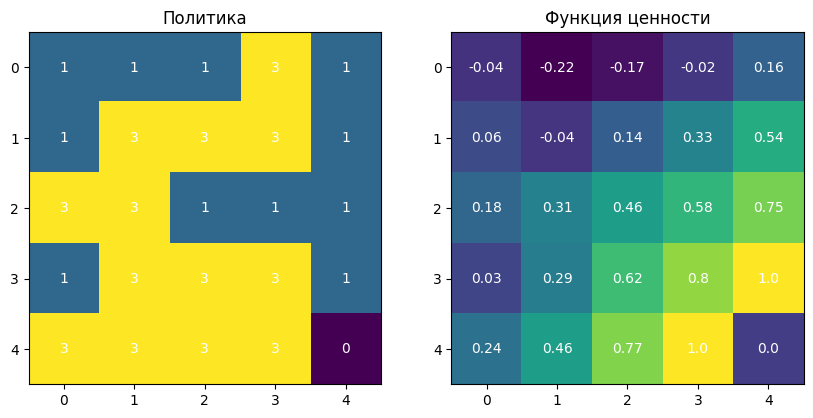

In [8]:
# Изучить и реализуйте epsilon-greedy стратегию для выбора действий

import numpy as np
import matplotlib.pyplot as plt

# Параметры
alpha = 0.1
gamma = 0.9
epsilon = 1.0
episodes = 2000
grid_size = 5

# Действия: вверх, вниз, влево, вправо
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

# Инициализация Q-таблицы
Q = np.zeros((grid_size, grid_size, len(actions)))

# Загрузка сохраненной таблицы, если есть
try:
    Q = np.load('q_table.npy')
except FileNotFoundError:
    pass

# Функции для выбора действий и обновления Q-таблицы
def choose_action(state):
    if np.random.rand() < epsilon:
        return np.random.randint(len(actions))  # Случайное исследование
    else:
        return np.argmax(Q[state])  # Использование текущей наилучшей стратегии

def step(state, action):
    next_state = (state[0] + actions[action][0], state[1] + actions[action][1])
    if next_state[0] < 0 or next_state[0] >= grid_size or next_state[1] < 0 or next_state[1] >= grid_size:
        next_state = state  # Остаться на месте, если выход за пределы
    reward = 1 if next_state == (grid_size-1, grid_size-1) else -0.1
    done = next_state == (grid_size-1, grid_size-1)
    return next_state, reward, done

def update_sarsa(state, action, reward, next_state, next_action):
    td_target = reward + gamma * Q[next_state][next_action]
    td_error = td_target - Q[state][action]
    Q[state][action] += alpha * td_error

# Коэффициент уменьшения epsilon
epsilon_decay = 0.995

# Обучение агента с использованием SARSA
for episode in range(episodes):
    state = (0, 0)
    action = choose_action(state)
    done = False

    while not done:
        next_state, reward, done = step(state, action)
        next_action = choose_action(next_state)
        update_sarsa(state, action, reward, next_state, next_action)
        state, action = next_state, next_action

    # Уменьшаем epsilon
    epsilon *= epsilon_decay

    # Выводим информацию о процессе обучения каждые 100 эпизодов
    if episode % 100 == 0:
        print(f'Episode {episode}, Epsilon: {epsilon:.2f}')

# Сохраняем обученную модель
np.save('q_table.npy', Q)

# Визуализация оптимальной политики
policy = np.argmax(Q, axis=2)
print("Оптимальная политика (SARSA):")
print(policy)

# Визуализация функции ценности
value_function = np.max(Q, axis=2)
plt.figure(figsize=(10, 6))

# Политика
plt.subplot(1, 2, 1)
plt.title('Политика')
plt.imshow(policy, cmap='viridis', origin='upper')
for i in range(grid_size):
    for j in range(grid_size):
        plt.text(j, i, policy[i, j], ha='center', va='center', color='white')

# Функция ценности
plt.subplot(1, 2, 2)
plt.title('Функция ценности')
plt.imshow(value_function, cmap='viridis', origin='upper')
for i in range(grid_size):
    for j in range(grid_size):
        plt.text(j, i, round(value_function[i, j], 2), ha='center', va='center', color='white')

plt.show()




